### 1D linear convection equation


$$
\begin{equation}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0
\end{equation}
$$

We will discretize the above equation.where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. With given initial conditions, the only unknown in this discretization is $u_i^{n+1}$.  We solve for this unknown to get an equation that lets us step in time, as follows:

$$
\begin{equation}
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
\end{equation}
$$

1D equation discretized forward in time and backward in space 

In [60]:
import numpy
from matplotlib import pyplot
%matplotlib inline

As a first exercise, we'll solve the 1D linear convection equation with a *square wave* initial condition, defined as follows:

$$
\begin{equation}
u(x,0)=\begin{cases}2 & \text{where } 0.5\leq x \leq 1,\\
1 & \text{everywhere else in } (0, 2)
\end{cases}
\end{equation}
$$

We also need a boundary condition on $x$: let $u=1$ at $x=0$. Our spatial domain for the numerical solution will only cover the range $x\in (0, 2)$.

In [61]:
# Set parameters.
nx = 40  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 25  # number of time steps
dt = 0.02  # time-step size
c = 1.0  # convection speed

# Define the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx) 

To initilize the conditions for the square wave mentioned above, we are using numpy.where() function to return a vector that meets numpy.logical_and() function.

In [62]:
# Set initial conditions with 1.0 everywhere (for now).
u0 = numpy.ones(nx) # we creating u0 that filled with ones of nx shape

# Get a list of indices where 0.5 <= x <= 1.0.
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
print(mask)
print(x)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int64),)
[0.         0.05128205 0.1025641  0.15384615 0.20512821 0.25641026
 0.30769231 0.35897436 0.41025641 0.46153846 0.51282051 0.56410256
 0.61538462 0.66666667 0.71794872 0.76923077 0.82051282 0.87179487
 0.92307692 0.97435897 1.02564103 1.07692308 1.12820513 1.17948718
 1.23076923 1.28205128 1.33333333 1.38461538 1.43589744 1.48717949
 1.53846154 1.58974359 1.64102564 1.69230769 1.74358974 1.79487179
 1.84615385 1.8974359  1.94871795 2.        ]


mask variable that defined above will give the indexs of x, where 'x>= 0.5' and 'x<= 1.0' , later we need to update the u0 for the initial conditions.

In [63]:
# Set initial condition u = 2.0 where 0.5 <= x <= 1.0.
u0[mask] = 2.0
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


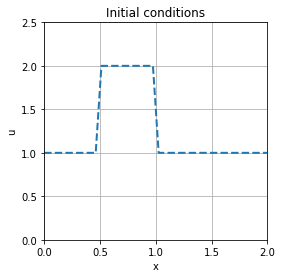

In [64]:
# Plot the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

writing our 1d convection equation in finite difference method, for this I used two nested loops(ofcourse, it's not efficient) but it is easy to understand. we need to find the u for every element of discretise grid.


$$
\begin{equation}
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
\end{equation}
$$


few things about 1d linear convection equation
1. its shape does not change, being always the same as the initial wave, $u_0$, only shifted in the $x$-direction; and 
2. it's constant along so-called **characteristic curves**, $x-ct=$constant. This means that for any point in space and time, you can move back along the characteristic curve to $t=0$ to know the value of the solution.

In [65]:
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])
print(u.shape)    

(40,)


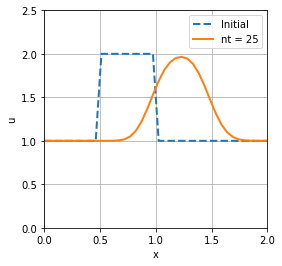

In [66]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

From above plot we can infer that, wave moved along x direction for 25 time steps but new wave looks no way close to square it is because of the approximation we made in finite difference. If we increase spatial discretization points it may come closer to the  sqaure.

### 1D Non-linear convection problem

$$
\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
\end{equation}
$$

The difference between linear convection to non-linear problem is constant c replaced by the u, so it is product of the solution u and it's derivative makes the equation non-linear.


$$
\begin{equation}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)
\end{equation}
$$


Here we gonna use better efficient method,loops makes code slower, so here we're using numpy array slicing.  We can compare the code with below for better understanding.

```Python
for n in range(1, nt):  
  un = u.copy() 
  for i in range(1, nx): 
    u[i] = un[i] - un[i]*dt/dx*(un[i]-un[i-1]) 
```

In [67]:
nx = 41  # number of spatial discrete points
L = 2.0  # length of the 1D domain
dx = L / (nx - 1)  # spatial grid size
nt = 10  # number of time steps
dt = 0.02  # time-step size

x = numpy.linspace(0.0, L, num=nx)
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

In [68]:
#Example of Array slicing
u2= numpy.arange(1,20)
print(u2[1:])
print(u2[:-1])
print(u2[1:] - u2[:-1])


# Compute the solution using Euler's method and array slicing.
u = u0.copy()

for n in range(1, nt):
    u[1:] = u[1:] - dt / dx * u[1:] * (u[1:] - u[:-1])

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


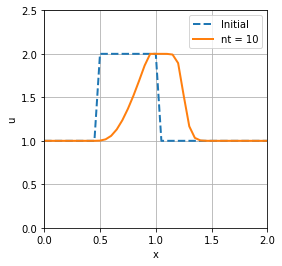

In [69]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5);

### CFL Condition

The Numerical domain of dependence must cover the physical domain of dependence, 

$$
\begin{equation}
\sigma = \frac{c \Delta t}{\Delta x} \leq 1
\end{equation}
$$

$$
\begin{equation}
\ \textrm{slope of numerical domain of dependence} = \frac{ \Delta t}{\Delta x} 
\end{equation}
$$

$$
\begin{equation}
\ \textrm{slope of physical domain of dependence} = \frac{ 1}{c} 
\end{equation}
$$

so, as mentioned before the slope of numerical domain of dependence should always less than slope of physical domain of depedence, or else we will experience a spurious oscillations. As can be proven formally, stability of the numerical solution requires that step size `dt` is calculated with respect to the size of `dx` to satisfy the condition above.  

The value of $c\Delta t/\Delta x$ is called the **Courant-Friedrichs-Lewy number** (CFL number), often denoted by $\sigma$. The value $\sigma_{\text{max}}$ that will ensure stability depends on the discretization used; for the forward-time/backward-space scheme, the condition for stability is $\sigma<1$.

In [70]:
def linear_convection_cfl(nx, L=2.0, c=1.0, sigma=0.5, nt=20):
    """
    Solves the 1D linear convection equation
    with constant speed c in the domain [0, L]
    and plots the solution (along with the initial conditions).
    Here, the time-step size is calculated based on a CFL constraint.

    Parameters
    ----------
    nx : integer
        Number of grid points to discretize the domain.
    L : float, optional
        Length of the domain; default: 2.0.
    c : float, optional
        Convection speed; default: 1.0.
    sigma : float, optional
        CFL constraint; default: 0.5.
    dt : float, optional
        Time-step size; default: 0.025.
    nt : integer, optional
        Number of time steps to compute; default: 20.
    """
    # Discretize spatial grid.
    dx = L / (nx - 1)
    x = numpy.linspace(0.0, L, num=nx)
    # Compute the time-step size based on the CFL constraint.
    dt = sigma * dx / c
    # Set initial conditions.
    u0 = numpy.ones(nx)
    mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
    u0[mask] = 2.0
    # Integrate the solution in time.
    u = u0.copy()
    for n in range(1, nt):
        u[1:] = u[1:] - c * dt / dx * (u[1:] - u[:-1])
    # Plot the solution along with the initial conditions.
    pyplot.figure(figsize=(4.0, 4.0))
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
    pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
    pyplot.legend()
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5);